## <font color='red'>Data Analysis</font> 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Getting some information from Google Analytics data

In [2]:
data_full = pd.read_csv('../TFM_Granatiero_Data/week_01mar_30abr.csv', index_col=0)
restaurants_df = pd.read_csv('../TFM_Granatiero_Data/restaurants_Datos_Init_01_05_2021.csv', index_col=0)
data_full.shape

(458641, 9)

In [3]:
data_full.columns

Index(['event_name', 'event_timestamp', 'user_pseudo_id',
       'firebase_screen_string_value', 'name_string_value',
       'type_string_value', 'action_string_value', 'vibes_string_value',
       'dir_string_value'],
      dtype='object')

#### Importing all the preprocess functions, to get these data frame:

* data_full: the dataframe after initialization as it is without any preprocess.
* simple_data_uncleaned: after pre.init_simple_data the df without "not Madrid" restaurants and with unofficials user_id and restaurant_id. It drops all the filters actions
- simple_data_cleaned: pre.clean_anomalies(N_min, N_max) filters a min and a max number of actions.
+ simple_data_cleaned_filtered: pre.filter_data_for_collaborative() add "is_positive" column and drops the removed favourites 
* score_bin: pre.fit_data_score_bin() generates the df with all the binary scores between users and items. Just 1 are taking into account
* UI_bin: pre.fit_User_Items_bin() generates the binary user items matrix

In [5]:
from TFM_Granatiero_Utils.TFM_Pre_Process import *
Score_Rules=[]
pre = PreProcessing_Data(data_full, restaurants_df, Score_Rules)
pre.init_simple_data()
simple_data_uncleaned = pre.simple_data.copy()
pre.clean_anomalies(10, 1000)
simple_data_cleaned = pre.simple_data.copy()
pre.filter_data_for_collaborative()
simple_data_cleaned_filtered = pre.simple_data.copy()
pre.fit_data_score_bin()
score_bin = pre.score_data_bin.copy() 
pre.fit_User_Items_bin()
UI_bin = pre.User_Items_bin.copy() 


In [6]:
data_full.head()

,event_name,event_timestamp,user_pseudo_id,firebase_screen_string_value,name_string_value,type_string_value,action_string_value,vibes_string_value,dir_string_value
0,view_item,1615122075978494,cf787fe9a8f5cd3d0a7119e296920e96,RestaurantDetails,Coquetto Bar,NaN,NaN,NaN,NaN
1,view_item,1615122002536876,cf787fe9a8f5cd3d0a7119e296920e96,RestaurantDetails,Coquetto Bar,NaN,NaN,NaN,NaN
2,view_item,1615148229440659,C42314CB72C146BFB3A8A447A1F13F1A,RestaurantDetails,El Señor Martín,NaN,NaN,NaN,NaN
3,view_item,1615152930412024,C42314CB72C146BFB3A8A447A1F13F1A,RestaurantDetails,La Catapa,NaN,NaN,NaN,NaN
4,view_item,1615152981578048,C42314CB72C146BFB3A8A447A1F13F1A,RestaurantDetails,La Monte,NaN,NaN,NaN,NaN


In [7]:
simple_data_uncleaned.head()

,name_string_value,event_name,event_timestamp,action_string_value,dir_string_value,user_pseudo_id,restaurant_id,user_id
0,La Espumosa,view_item,1615107614879421,NaN,NaN,A891C11FDF9A405F9CC0CC8D9D75550B,99,9
1,La Espumosa,view_item,1615115523233930,NaN,NaN,307FBCC7802041A2BE2980710343184E,99,12
2,La Espumosa,MY_FAVS_REMOVE_RESTAURANT,1615132277329030,NaN,NaN,D68A65D2455747D798E246A707A0AB61,99,13
3,La Espumosa,CARD_SWIPE,1615157709455358,NaN,LEFT,C42314CB72C146BFB3A8A447A1F13F1A,99,1
4,La Espumosa,CARD_SWIPE,1615157814637605,NaN,LEFT,C42314CB72C146BFB3A8A447A1F13F1A,99,1


### Getting some number about users and restaurants

In [8]:
Full_users_set = set(data_full.user_pseudo_id)
print('Till may there are {} users'.format(len(Full_users_set)))
Madrid_users_set = set(simple_data_uncleaned.user_pseudo_id)
print('In Madrid there are {} users'.format(len(Madrid_users_set)))
print('The number of madrid users with almost one like are {}'.format(len(set(UI_bin.index))))
print('The number of madrid restaurants with almost one like are {}'.format(len(set(UI_bin.columns))))

pre.simple_data = simple_data_cleaned_filtered
pre.fit_data_score_bin()
pre.fit_User_Items_bin(5,5)
UI_bin_min5 = pre.User_Items_bin.copy() 

print('The number of madrid users with almost five like are {}'.format(len(set(pre.User_Items_bin.index))))
print('The number of madrid restaurants with almost five like are {}'.format(len(set(pre.User_Items_bin.columns))))
print('The number of interactions is {}'.format(pre.User_Items_bin.sum().sum()))

Till may there are 7503 users
In Madrid there are 6854 users
The number of madrid users with almost one like are 3027
The number of madrid restaurants with almost one like are 189
The number of madrid users with almost five like are 1450
The number of madrid restaurants with almost five like are 187
The number of interactions is 24740


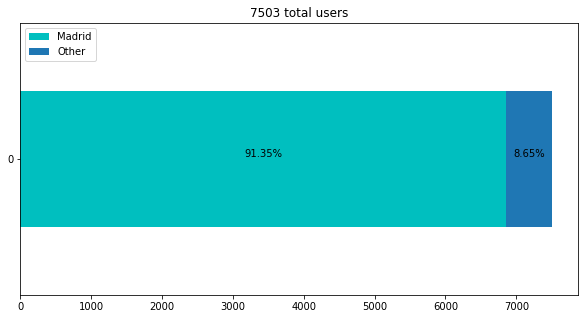

In [9]:
mad_pc = (len(Madrid_users_set)/len(Full_users_set))*100
othr_pc = (len(Full_users_set)-len(Madrid_users_set))/(len(Full_users_set))*100

y1 = [len(Madrid_users_set)]
y2 = [len(Full_users_set)-len(Madrid_users_set)]

df = pd.DataFrame({'Madrid' : y1,'Other' : y2})

ax = df.plot.barh(stacked=True,color=[ "c", "tab:blue"]);

ax.figure.set_size_inches(10,5)
ax.text(y1[0]/2, 0, str(round(mad_pc,2))+'%', ha='center', va='bottom')
ax.text(y1[0] + y2[0]/2, 0, str(round(othr_pc,2))+'%', ha='center', va='bottom')

ax.set_title("7503 total users")
ax.legend(loc='upper left')

#ax.figure.savefig('TFM_figures/Total_Users.jpg', dpi=300, bbox_inches="tight")

### Counting the actions outside the restaurants' pages:

In [10]:
data_full.event_name.value_counts()

CARD_SWIPE                   305073
view_item                     57233
RESTAURANT_FAVOURITE          31623
RESTAURANT_ACTION             27925
HOME_FILTERS                  27665
FILTER_ADDED                   8228
MY_FAVS_REMOVE_RESTAURANT       580
MY_FAVS_FILTER_ADDED            306
RESTAURANT_BLACKLISTED            8
Name: event_name, dtype: int64

In [11]:
data_full.action_string_value.value_counts()

menu               6786
favourite_press    5636
instagram          4236
website            3749
book_url           3055
maps               2349
curated_by          772
chefInstagram       507
delivery            462
call                373
Name: action_string_value, dtype: int64

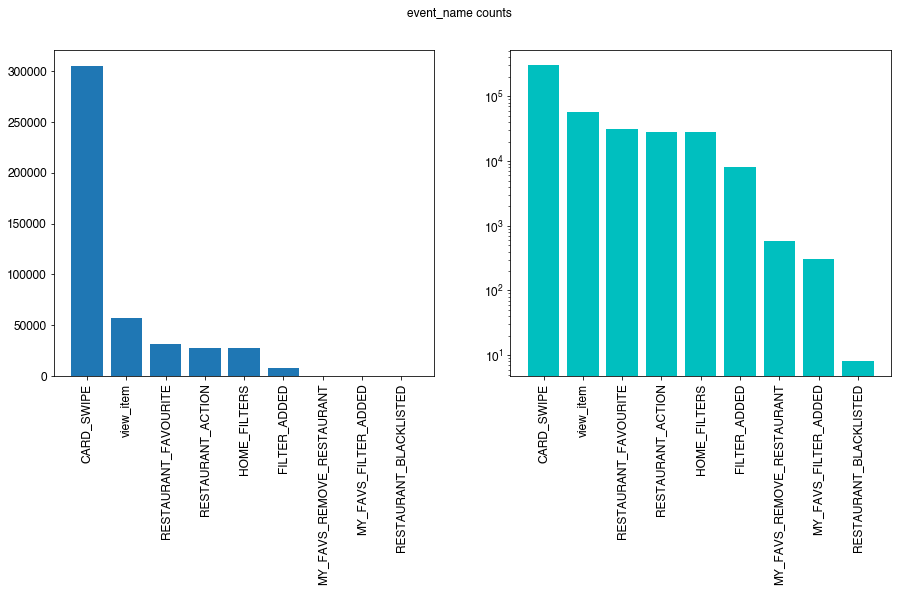

In [12]:
ser = data_full.event_name.value_counts()

# Defines the chart font style
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 12}

# includes the chart font style
plt.rc('font', **font)

# To define figure size
figure(num=None, figsize=(15, 6))

# Defines X-axis labels and Y-axis values
x_axis_labels = list(ser.index)
y_axis_values = list(ser.values)
y_pos=np.arange(len(x_axis_labels))

# Draw first subplot using plt.subplot
plt.subplot(1, 2, 1)
plt.bar(x_axis_labels,y_axis_values, color='tab:blue')
plt.xticks(y_pos, x_axis_labels, rotation='vertical', fontsize=12)
#plt.xlabel('First X-Axis')
#plt.ylabel('Number in log10 scale')

# Draw second subplot using plt.subplot
plt.subplot(1, 2, 2)
plt.bar(x_axis_labels,y_axis_values, color = 'c')
plt.yscale('log')            # Defines log scale
plt.xticks(y_pos, x_axis_labels, rotation='vertical', fontsize=12)

#plt.xlabel('First Y-Axis')
#plt.ylabel('Number of posts in log10 scale')
plt.suptitle("event_name counts", fontsize=12)

#plt.savefig('TFM_figures/event_name_counts.jpg', dpi=300, bbox_inches="tight")

plt.show()



### Counting the actions inside the restaurants' pages:

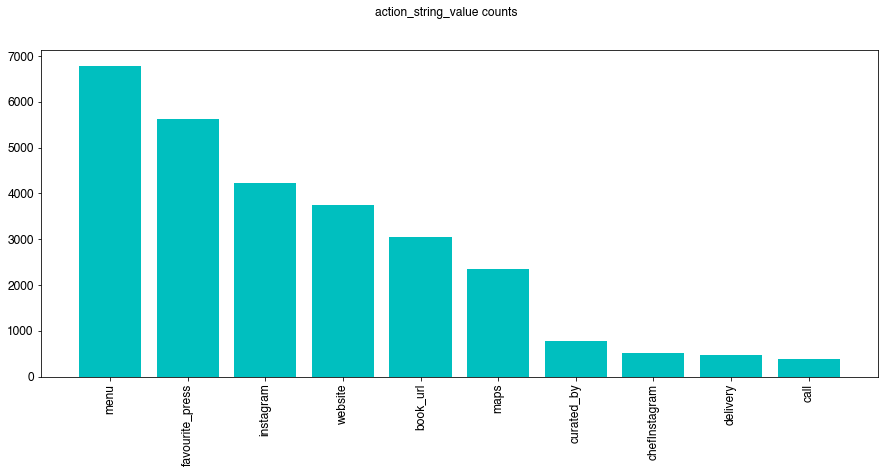

In [14]:
ser = data_full.action_string_value.value_counts()

# Defines the chart font style
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 12}

# includes the chart font style
plt.rc('font', **font)

# To define figure size
figure(num=None, figsize=(15, 6))

# Defines X-axis labels and Y-axis values
x_axis_labels = list(ser.index)
y_axis_values = list(ser.values)
y_pos=np.arange(len(x_axis_labels))

plt.bar(x_axis_labels,y_axis_values, color = 'c')
plt.xticks(y_pos, x_axis_labels, rotation='vertical', fontsize=12)

#plt.xlabel('First Y-Axis')
#plt.ylabel('Number of posts in log10 scale')
plt.suptitle("action_string_value counts", fontsize=12)

#plt.savefig('TFM_figures/action_string_value_counts.jpg', dpi=300, bbox_inches="tight")


plt.show()



### Counting Card Swipe proportions

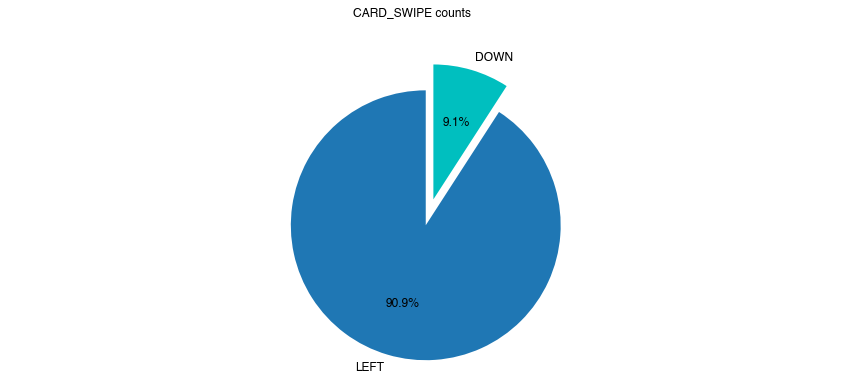

In [15]:
ser = data_full.dir_string_value.value_counts()
ser = data_full.dir_string_value.value_counts()
left_pc = (ser.values[0]/ser.values.sum())*100
down_pc = (ser.values[1]/ser.values.sum())*100

# Defines the chart font style
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 12}

# To define figure size
figure(num=None, figsize=(15, 6))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'LEFT', 'DOWN'
sizes = [left_pc, down_pc]
explode = (0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=['tab:blue', 'c'])

plt.axis('equal')

plt.suptitle("CARD_SWIPE counts", fontsize=12)

#plt.savefig('TFM_figures/CARD_SWIPE_counts.jpg', dpi=300, bbox_inches="tight")

plt.show()



### Box plot of all users interactions with and without swipe

In [16]:
days = data_full.event_timestamp.sort_values()
print('The first day is {}'.format(pd.to_datetime(days[0], unit='us')))
print('The last day is {}'.format(pd.to_datetime(days[days.index[-1]], unit='us')))


The first day is 2021-03-07 13:01:15.978494
The last day is 2021-04-30 21:59:58.534850


       event_timestamp
count      7503.000000
mean         61.127682
std         112.277135
min           1.000000
25%           8.000000
50%          25.000000
75%          71.000000
max        4423.000000
       event_timestamp
count      7503.000000
mean         24.182194
std          44.725300
min           1.000000
25%           4.000000
50%           9.000000
75%          26.000000
max        1263.000000


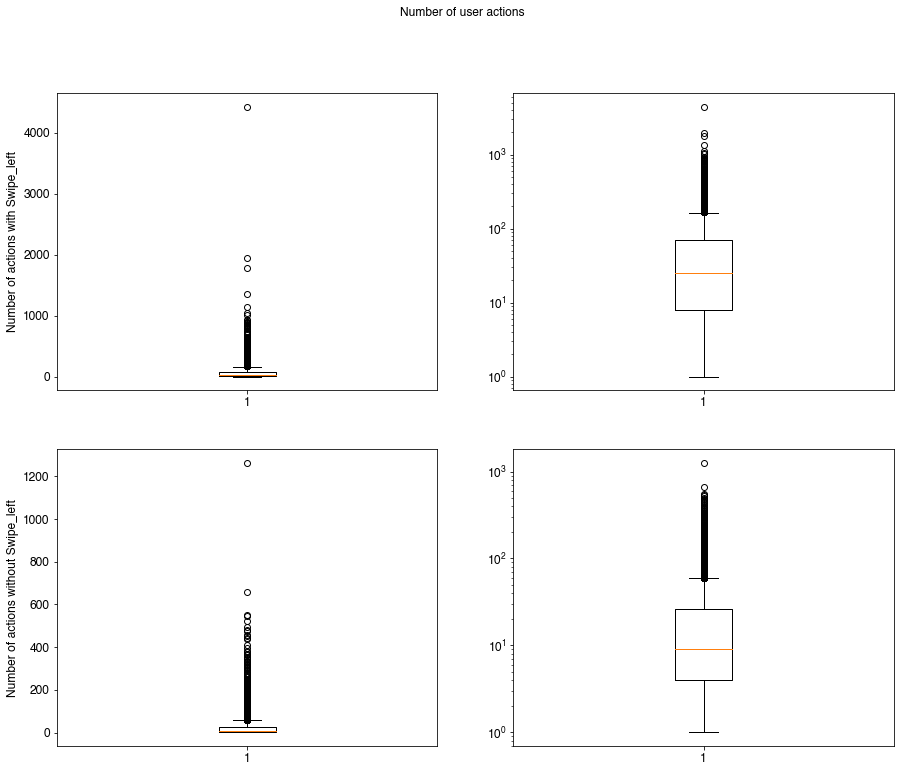

In [17]:
data_no_left = data_full[data_full.dir_string_value!='LEFT']

ser = data_full.pivot_table(values="event_timestamp", index="user_pseudo_id", aggfunc=pd.Series.nunique).fillna(0)
ser_no_left = data_no_left.pivot_table(values="event_timestamp", index="user_pseudo_id", aggfunc=pd.Series.nunique).fillna(0)
print(ser.describe())
print(ser_no_left.describe())

# Defines the chart font style
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 12}

# includes the chart font style
plt.rc('font', **font)

# To define figure size
figure(num=None, figsize=(15, 12))

# Draw first subplot using plt.subplot
plt.subplot(2, 2, 1)
plt.boxplot(ser.values.reshape(len(ser)))
plt.ylabel('Number of actions with Swipe_left')


# Draw second subplot using plt.subplot
plt.subplot(2, 2, 2)
plt.boxplot(ser.values.reshape(len(ser)))
plt.yscale('log')            # Defines log scale

# Draw first subplot using plt.subplot
plt.subplot(2, 2, 3)
plt.boxplot(ser_no_left.values.reshape(len(ser)))
plt.ylabel('Number of actions without Swipe_left')


# Draw second subplot using plt.subplot
plt.subplot(2, 2, 4)
plt.boxplot(ser_no_left.values.reshape(len(ser)))
plt.yscale('log')            # Defines log scale


#plt.xlabel('First Y-Axis')
#plt.ylabel('Number of posts in log10 scale')
plt.suptitle("Number of user actions", fontsize=12)

#plt.savefig('TFM_figures/action_counts_boxplots.jpg', dpi=300, bbox_inches="tight")

plt.show()

### Time behaviour of users' interactions

In [18]:
def get_usr_activity_df(data_full):
    
    data_full['date'] = pd.to_datetime(data_full['event_timestamp'], unit='us').dt.date
    pseudo_id_set = set(data_full.user_pseudo_id)
    activity_df = pd.DataFrame(index=list(pseudo_id_set), columns=['delta', 'differents_days_activity'])

    for pseudo_id in pseudo_id_set:
        
        usr_dates = data_full[data_full.user_pseudo_id==pseudo_id].date.sort_values(ascending=False)
        delta = usr_dates.iloc[0]-usr_dates.iloc[len(usr_dates)-1]
        activity_df.loc[pseudo_id,'delta']=delta
        activity_df.loc[pseudo_id,'differents_days_activity']=len(usr_dates.unique())
    return activity_df


In [19]:
activity_df = get_usr_activity_df(data_full)
activity_df.head()

,delta,differents_days_activity
9810952C12A64E8ABC8EB8552C20D170,0:00:00,1
2412AA612FEC401E98467CFB2D4B0006,0:00:00,1
9d3ed2789ddb9ac353bf33663fa206b8,0:00:00,1
01458E9F893A43CEBAD2568422FC3501,0:00:00,1
33056235BE944A64B74C58C89038EEC6,"38 days, 0:00:00",3


#### Fidelity of users during time

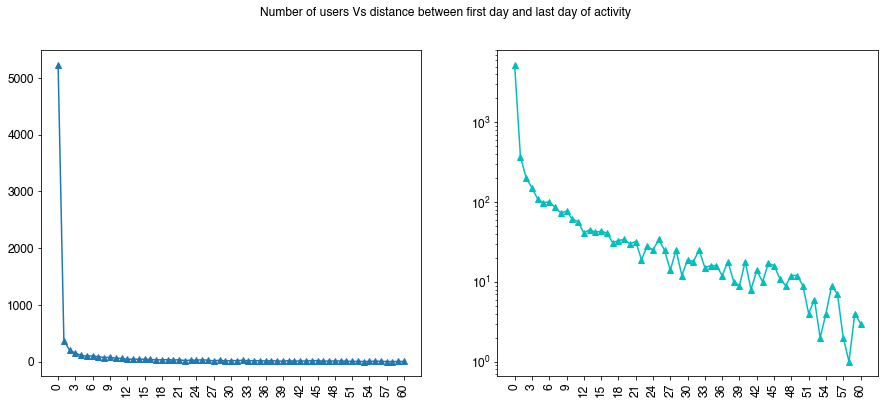

In [20]:
ser = activity_df.delta.value_counts()
ser = ser.loc[ser.index.sort_values()]

# Defines the chart font style
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 12}

# includes the chart font style
plt.rc('font', **font)

# To define figure size
figure(num=None, figsize=(15, 6))

# Defines X-axis labels and Y-axis values
x_axis_labels = [str(i.days) for i in ser.index]
x_axis_values = [i.days for i in ser.index]
y_axis_values = list(ser.values)
y_pos=np.arange(len(x_axis_labels))

# Draw first subplot using plt.subplot
plt.subplot(1, 2, 1)
plt.plot(x_axis_values,y_axis_values, color='tab:blue', marker="^")
plt.xticks(x_axis_values[::3], x_axis_labels[::3], rotation='vertical')
plt.locator_params(axis='x_axis_values', nbins=len(x_axis_values)/2)

# Draw second subplot using plt.subplot
plt.subplot(1, 2, 2)
plt.plot(x_axis_values,y_axis_values, color='c', marker="^")
plt.yscale('log')            # Defines log scale
plt.xticks(x_axis_values[::3], x_axis_labels[::3], rotation='vertical')
plt.locator_params(axis='x_axis_labels', nbins=len(x_axis_labels)/2)

plt.suptitle("Number of users Vs distance between first day and last day of activity", fontsize=12)

#plt.savefig('TFM_figures/Number_usersVs_distance_days_activity.jpg', dpi=300, bbox_inches="tight")

plt.show()


#### Different days of activity of all users

/Users/pablogranatiero/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


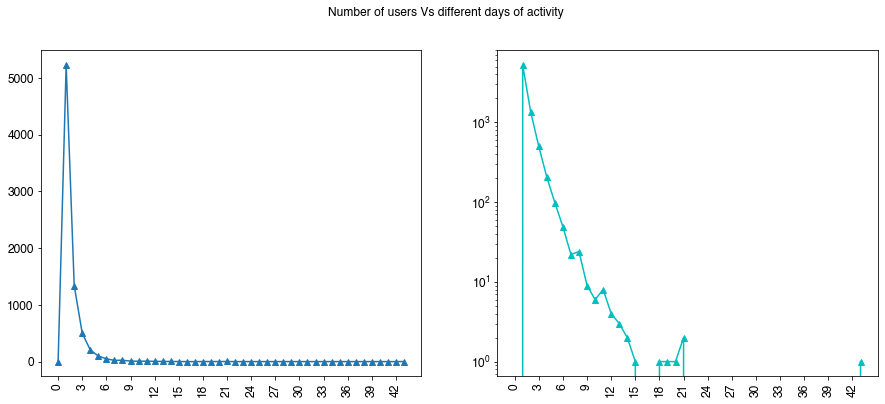

In [21]:
ser_to_plot = activity_df.differents_days_activity.value_counts()
ser_to_plot = ser_to_plot.loc[ser_to_plot.index.sort_values()]

ser = pd.Series(index=range(ser_to_plot.index.max()+1))
ser.loc[ser_to_plot.index] = ser_to_plot
ser = ser.fillna(0)

# Defines the chart font style
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 12}

# includes the chart font style
plt.rc('font', **font)

# To define figure size
figure(num=None, figsize=(15, 6))

# Defines X-axis labels and Y-axis values
x_axis_values = [i for i in ser.index]
x_axis_labels = [str(i) for i in ser.index]
y_axis_values = list(ser.values)
y_pos=np.arange(len(x_axis_labels))

# Draw first subplot using plt.subplot
plt.subplot(1, 2, 1)
plt.plot(x_axis_values,y_axis_values, color='tab:blue', marker="^")
plt.xticks(x_axis_values[::3], x_axis_labels[::3], rotation='vertical')
plt.locator_params(axis='x_axis_values', nbins=len(x_axis_values)/2)


# Draw second subplot using plt.subplot
plt.subplot(1, 2, 2)
plt.plot(x_axis_values,y_axis_values, color='c', marker="^")
plt.yscale('log')            # Defines log scale
plt.xticks(x_axis_values[::3], x_axis_labels[::3], rotation='vertical')
plt.locator_params(axis='x_axis_labels', nbins=len(x_axis_labels)/2)

plt.suptitle("Number of users Vs different days of activity", fontsize=12)

#plt.savefig('TFM_figures/Number_usersVs_different_days_activity.jpg', dpi=300, bbox_inches="tight")

plt.show()

### Statistcs about likes

In [22]:
UI_bin.sum().describe()

count    189.000000
mean     147.777778
std      119.815520
min        1.000000
25%       61.000000
50%      116.000000
75%      213.000000
max      696.000000
dtype: float64

In [23]:
spars = UI_bin.sum().sum()/(UI_bin.shape[0]*UI_bin.shape[1])
print('The sparsity of the User-Item matrix is {}'.format(spars))

The sparsity of the User-Item matrix is 0.04881988033623316


### Counting likes for all users and for all restaurants

Text(0, 0.5, 'Number of likes')

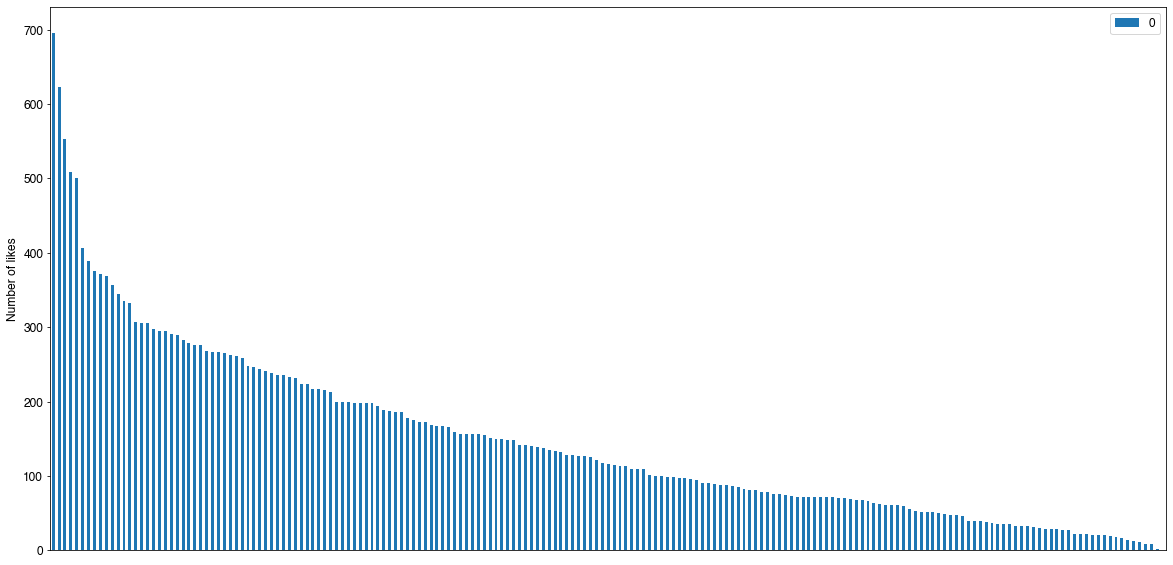

In [24]:
restaurants_count = pd.DataFrame(UI_bin.sum()).sort_values(by=0,ascending=False)

restaurants_count.plot.bar().xaxis.set_visible(False)
plt.gcf().set_size_inches(20,10)
plt.ylabel('Number of likes')
#plt.savefig('TFM_figures/Likes_Vs_Restaurants.jpg', dpi=300, bbox_inches="tight")

Text(0, 0.5, 'Number of likes')

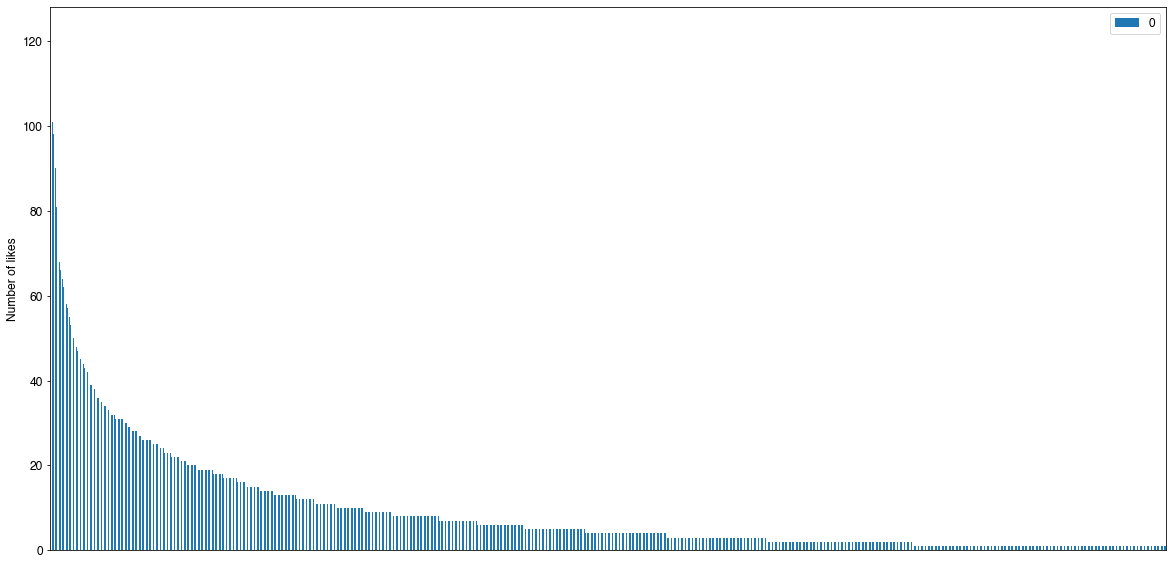

In [25]:
users_count = pd.DataFrame(UI_bin.sum(axis=1)).sort_values(by=0,ascending=False)

users_count.plot.bar().xaxis.set_visible(False)
plt.gcf().set_size_inches(20,10)
plt.ylabel('Number of likes')
#plt.savefig('TFM_figures/Likes_Vs_Users.jpg', dpi=300, bbox_inches="tight")

## Getting some information from app data

In [26]:
#To Download Init Data
import os

def open_app_datas(dir_path):
    
    def save_Datos(name, dir_path):
        file_path = dir_path + '/' + name + '.csv' 
        return pd.read_csv(file_path)

    list_of_df = []
    for filename_csv in os.listdir(dir_path):
        if filename_csv.endswith(".csv"):
            filename = os.path.splitext(filename_csv)[0]
            globals()[filename + '_' + dir_path] = save_Datos(filename, dir_path)
            list_of_df.append(filename + '_' + dir_path)
    
    return list_of_df 

In [28]:
list_data_init = open_app_datas('../TFM_Granatiero_Data/Datos_Init_01_05_2021')
list_data_init

['homes__first_action_neighborhoods_../TFM_Granatiero_Data/Datos_Init_01_05_2021',
 'reservations_../TFM_Granatiero_Data/Datos_Init_01_05_2021',
 'strapi_permission_../TFM_Granatiero_Data/Datos_Init_01_05_2021',
 'homes__second_action_food_types_../TFM_Granatiero_Data/Datos_Init_01_05_2021',
 'homes__second_action_neighborhoods_../TFM_Granatiero_Data/Datos_Init_01_05_2021',
 'homes_../TFM_Granatiero_Data/Datos_Init_01_05_2021',
 'profiles__vibes_../TFM_Granatiero_Data/Datos_Init_01_05_2021',
 'push_tokens_../TFM_Granatiero_Data/Datos_Init_01_05_2021',
 'components_restaurants_promoteds_../TFM_Granatiero_Data/Datos_Init_01_05_2021',
 'vibe_../TFM_Granatiero_Data/Datos_Init_01_05_2021',
 'neighborhoods_../TFM_Granatiero_Data/Datos_Init_01_05_2021',
 'profiles_../TFM_Granatiero_Data/Datos_Init_01_05_2021',
 'homes__first_action_food_types_../TFM_Granatiero_Data/Datos_Init_01_05_2021',
 'restaurants_components_../TFM_Granatiero_Data/Datos_Init_01_05_2021',
 'homecards__vibes_../TFM_Granati

In [30]:
total_set  = set(restaurants_df.name)
barna_set  = set(restaurants_df[restaurants_df.city==5.0].name)
madrid_set = set(restaurants_df[restaurants_df.city==4.0].name)

print('Till may there are {} restaurants in Madrid'.format(len(madrid_set)))
print('And {} restaurants in Barcelona'.format(len(barna_set)))


Till may there are 196 restaurants in Madrid
And 53 restaurants in Barcelona


Exception to menage: in restaurant_init there are these two duplicates

In [31]:
list_of_mad = list(restaurants_df[restaurants_df.city==4.0].name)
import collections

print([item for item, count in collections.Counter(list_of_mad).items() if count > 1])


['Kappo', 'Salvaje']


### Counting the cities of all restaurants

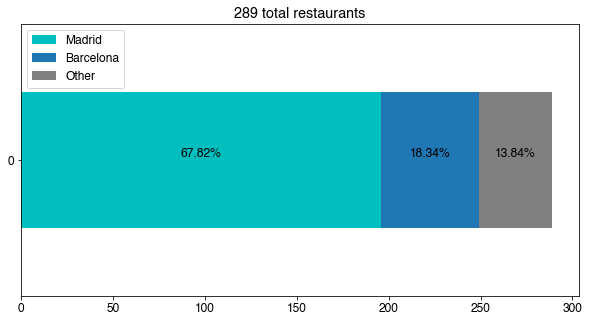

In [33]:
total_set  = set(restaurants_df.name)
barna_set  = set(restaurants_df[restaurants_df.city==5.0].name)
madrid_set = set(restaurants_df[restaurants_df.city==4.0].name)

y1 = [len(madrid_set)]
y2 = [len(barna_set)]
y3 = [len(total_set) - len(madrid_set)-len(barna_set)]

df = pd.DataFrame({'Madrid' : y1,'Barcelona' : y2, 'Other' : y3})

ax = df.plot.barh(stacked=True,color=[ "c", "tab:blue", 'grey']);

ax.figure.set_size_inches(10,5)
ax.text(y1[0]/2, 0, str(round((y1[0]/len(total_set)*100),2))+'%', ha='center', va='bottom')
ax.text(y1[0] + y2[0]/2, 0, str(round((y2[0]/len(total_set)*100),2))+'%', ha='center', va='bottom')
ax.text(y1[0] + y2[0] + y3[0]/2, 0, str(round((y3[0]/len(total_set)*100),2))+'%', ha='center', va='bottom')

ax.set_title("{} total restaurants".format(len(total_set)))
ax.legend(loc='upper left')

#ax.figure.savefig('TFM_figures/Total_Restaurants.jpg', dpi=300, bbox_inches="tight")

Second exception to manage: four restaurants with the same name: there are four restuarants based both in Madrid and Barcelona.

In [34]:
restaurants_df[restaurants_df.name=='99 Sushi Bar']

,id,name,chef,price,specialDish,phoneNumber,bookUrl,instagramUrl,chefInstagramUrl,mapUrl,...,legacy_id,published_at,created_by,updated_by,created_at,updated_at,neighborhood,city,reservation,slug
20,332,99 Sushi Bar,Roberto Limas,80€ pp,Nigiri de toro flambeado con tomate,+34 914312715,https://www.covermanager.com/reserve/module_re...,https://www.instagram.com/99sushibar/,https://www.instagram.com/robertolimas_chef99/,https://goo.gl/maps/urom3wJ2sYnh9XQ2A,...,6sJABHM2rR4lpfzy114P,2021-01-20 16:50:18,NaN,1.0,2021-01-20 16:50:18,2021-04-26 15:03:29,34.0,4.0,NaN,99-sushi-bar
55,367,99 Sushi Bar,Roberto Limas,80€ per person,Toro tuna,+34 936 396 217,https://www.covermanager.com/reserve/module_re...,https://www.instagram.com/99sushibar/,https://www.instagram.com/robertolimas_chef99/,https://goo.gl/maps/AhqSx1kMitiGJ9cs8,...,L7K8AjkHioJt1Ke8oLCC,2021-01-20 16:51:35,NaN,1.0,2021-01-20 16:51:35,2021-04-26 15:03:35,39.0,5.0,NaN,99-sushi-bar-1


In [35]:
restaurants_df[restaurants_df.name=='Cadaqués']

,id,name,chef,price,specialDish,phoneNumber,bookUrl,instagramUrl,chefInstagramUrl,mapUrl,...,legacy_id,published_at,created_by,updated_by,created_at,updated_at,neighborhood,city,reservation,slug
287,601,Cadaqués,NaN,35-50€ pp,Mejillones con sofrito picante,+34932687033,https://module.lafourchette.com/es_ES/module/2...,https://www.instagram.com/restaurantcadaquesbcn/,NaN,https://g.page/cadaquesbarcelona?share,...,NaN,NaN,2.0,2.0,2021-05-04 23:18:14,2021-05-04 23:36:30,37.0,5.0,NaN,cadaques
288,602,Cadaqués,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,2021-05-04 23:23:49,2021-05-04 23:23:55,34.0,4.0,NaN,cadaques-1


In [36]:
restaurants_df[restaurants_df.name=='EatMyTrip']

,id,name,chef,price,specialDish,phoneNumber,bookUrl,instagramUrl,chefInstagramUrl,mapUrl,...,legacy_id,published_at,created_by,updated_by,created_at,updated_at,neighborhood,city,reservation,slug
250,562,EatMyTrip,Genia Sukhacheva,20-30€ pp,Pancake party,+34611151030,https://admin.spotlinker.com/reservas/widget/4...,https://www.instagram.com/eatmytripmadrid/,https://www.instagram.com/geniasukhacheva/,https://g.page/eatmytripmadrid?share,...,NaN,2021-04-01 16:59:49,2.0,1.0,2021-03-31 09:38:28,2021-04-26 15:09:32,25.0,4.0,NaN,eat-my-trip
269,581,EatMyTrip,Genia Sukhacheva,20-30€ pp,Pancake party,+34635260286,NaN,https://www.instagram.com/eatmytrip/,https://www.instagram.com/geniasukhacheva/,https://g.page/eatmytrip?share,...,NaN,2021-04-21 18:46:54,2.0,1.0,2021-04-21 17:57:28,2021-04-26 15:09:38,31.0,5.0,NaN,eat-my-trip-1


In [37]:
restaurants_df[restaurants_df.name=='Fismuler']

,id,name,chef,price,specialDish,phoneNumber,bookUrl,instagramUrl,chefInstagramUrl,mapUrl,...,legacy_id,published_at,created_by,updated_by,created_at,updated_at,neighborhood,city,reservation,slug
76,388,Fismuler,Nino Redruello,30€ - 40€ pp,Tarta de queso,+34 91 827 75 81,https://www.covermanager.com/reservation/modul...,https://www.instagram.com/fismuler,https://www.instagram.com/ninoredruello/,https://g.page/fismuler-madrid?share,...,Rm4dHjqPZaLkfgwqdc4n,2021-01-20 16:52:21,NaN,1.0,2021-01-20 16:52:21,2021-04-26 15:07:10,24.0,4.0,NaN,fismuler
292,606,Fismuler,NaN,30-40€ pp,NaN,+34935140050,https://www.covermanager.com/reservation/modul...,https://www.instagram.com/fismuler,NaN,https://www.google.com/maps/place/Fismuler/@41...,...,Rm4dHjqPZaLkfgwqdc4n,2021-05-06 01:12:39,2.0,2.0,2021-05-06 01:12:35,2021-05-06 01:12:39,36.0,5.0,NaN,fismuler-1


Checking they not affect the recomm

checking if all users acutally like Fismuler, likes other restaurants just from madrid

In [38]:
Fismuler_users = set(data_full[data_full.name_string_value=='Fismuler'].user_pseudo_id)
usr_to_check=[]
for u in Fismuler_users:
    if len(set(data_full[data_full.user_pseudo_id==u].name_string_value))<=3:
           usr_to_check.append(u)
           

In [39]:
len(usr_to_check)

14

In [57]:
checked_Fismuler = []
for u in usr_to_check:
    for rest in set(data_full[data_full.user_pseudo_id==u].name_string_value) - set([np.nan, 'Fismuler']):
           checked_Fismuler.append(rest)

All the restaurants are from madrid so the users

In [61]:
set(checked_Fismuler) - madrid_set == set()

True

In [62]:
Sushi99_users = set(data_full[data_full.name_string_value=='99 Sushi Bar'].user_pseudo_id)
usr_to_check99=[]
for u in Sushi99_users:
    if len(set(data_full[data_full.user_pseudo_id==u].name_string_value))<=3:
           usr_to_check99.append(u)
len(usr_to_check99)           

0

In [41]:
EatMyTrip_users = set(data_full[data_full.name_string_value=='EatMyTrip'].user_pseudo_id)
usr_to_check_EatMyTrip=[]
for u in EatMyTrip_users:
    if len(set(data_full[data_full.user_pseudo_id==u].name_string_value))<=3:
           usr_to_check_EatMyTrip.append(u)
len(usr_to_check_EatMyTrip) 

16

In [63]:
checked_EatMyTrip = []
for u in usr_to_check_EatMyTrip:
    for rest in set(data_full[data_full.user_pseudo_id==u].name_string_value) - set([np.nan, 'EatMyTrip']):
           checked_EatMyTrip.append(rest)

Actually considering these restaurant we are taking into account just one user from Barcelona. This will not affect the recomm but has to be considered in the future

In [67]:
len(set(checked_EatMyTrip) - madrid_set)

1

In [68]:
Cadaqu_users = set(data_full[data_full.name_string_value=='Cadaqués'].user_pseudo_id)
usr_Cadaqu=[]
for u in Cadaqu_users:
    if len(set(data_full[data_full.user_pseudo_id==u].name_string_value))<=3:
           usr_to_Cadaqu.append(u)
len(usr_Cadaqu) 

0

### Restaurant based on interactions

In [69]:
'On the total {} restaurants, {} are active'.format(len(total_set), len(set(data_full.name_string_value)))

'On the total 289 restaurants, 244 are active'

These restaurants are not in restaurants_Datos_Init_01_05_2021 df and they will not be considered


In [70]:
active_madrid = set(simple_data_uncleaned.name_string_value)
not_mad_full = set(data_full.name_string_value) - active_madrid
not_in_init = not_mad_full - total_set
not_in_init

{'Bodegas Santa Cecilia (tienda)',
 'Buscamos colaboradores en Barcelona',
 'Cañadio',
 'Derechito',
 'Ferretería by EGO',
 'Hutong 81',
 'Maridaje',
 'Mercado de Ibiza (Tardeo)',
 'Restaurante Brisa',
 'Velada Premium BCN',
 'Velada Premium MAD',
 'Víavélez',
 nan,
 '🛵 Fat Barbies'}

These restaurants are based in Madrid for init but are not in data_full (no one interacted with them)


In [71]:
mad_not_in_full = madrid_set - set(data_full.name_string_value) 
mad_not_in_full

{'99 KO Sushi Bar',
 'Cadaqués',
 'El Pimiento Verde Quintana',
 'Punto MX',
 'Ramses',
 'Santceloni',
 'Sushita Café'}

Checking if all the restaurants in the Recommender are from Madrid


In [72]:
len(active_madrid), len(active_madrid) + len(mad_not_in_full) == len(madrid_set)

(189, True)

### Quick check on collaborative filter analysis

BINARY min_rated_restaurants=min_rated_users=1

In [ ]:
from TFM_Collaborative_Utyls import *

In [ ]:
scores = scores_bin(pre.score_data_bin, repeat=5, N_neigh=np.inf, K=5, min_rated_restaurants=1, min_rated_users=1, ts_size=0.1)
scores

BINARY min_rated_restaurants=min_rated_users=5

In [ ]:
scores5 = scores_bin(pre.score_data_bin, repeat=5, N_neigh=np.inf, K=5, min_rated_restaurants=5, min_rated_users=5, ts_size=0.1)
scores5

BINARY min_rated_restaurants=min_rated_users=5, N_neigh=10

In [ ]:
scores5_10 = scores_bin(pre.score_data_bin, repeat=5, N_neigh=10, K=5, min_rated_restaurants=5, min_rated_users=5, ts_size=0.1)
scores5_10